In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def analytic_M(T_p):
    T_p_c = 2.269185
    z = np.exp(- 2 / T_p)
    if T_p <= T_p_c:
        return np.power(1 + z**2, 1/4) * np.power(1 - 6 * z**2 + z**4, 1/8) / np.sqrt(1 - z**2)
    else:
        return 0

In [3]:
# number of spins on each row and column of the 2D array
Ns = np.array([50])

# temperature times the Bolzmann constant divided by J, T_p = k * T / J
T_ps = np.arange(0, 5.05, 0.05)

# number of steps taken in the Markov chain
steps = 500000

# an additional term to the energy divided by J due to an external magnetic field, H_p = H / J
H_ps = np.array([-0.6, -0.4, -0.2, 0., 0.2, 0.4, 0.6])

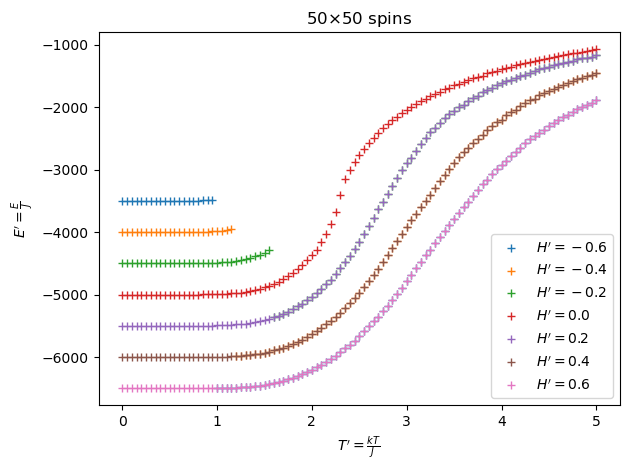

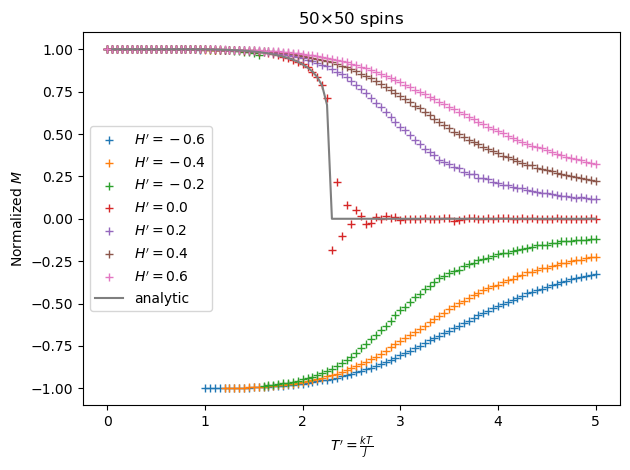

In [4]:
M_as = []
for T_p in T_ps[1:]:
    M_as.append(analytic_M(T_p))
M_as = np.array(M_as)

for N in Ns:
    fig, ax = plt.subplots()
    for H_p in H_ps:
        E_ps = np.load(f'Data/E_ps_N{N}_H_p{H_p}.npy')
        ax.plot(T_ps, E_ps, marker='+', linestyle='None', label=r'$H^{\prime}' + f' = {H_p}$')
    ax.legend()
    ax.set_xlabel(r'$T^{\prime} = \frac{kT}{J}$')
    ax.set_ylabel(r'$E^{\prime} = \frac{E}{J}$')
    ax.set_title(f'{N}' + r'$\times$' + f'{N} spins')
    fig.tight_layout()
    plt.savefig(f'Figs/energy_N{N}.png', bbox_inches='tight')
    plt.show()
    
for N in Ns:
    fig, ax = plt.subplots()
    for H_p in H_ps:
        M_norms = np.load(f'Data/M_norms_N{N}_H_p{H_p}.npy')
        ax.plot(T_ps, M_norms, marker='+', linestyle='None', label=r'$H^{\prime}' + f' = {H_p}$')
    ax.plot(T_ps[1:], M_as, label='analytic')
    ax.legend()
    ax.set_xlabel(r'$T^{\prime} = \frac{kT}{J}$')
    ax.set_ylabel(r'Normalized $M$')
    ax.set_title(f'{N}' + r'$\times$' + f'{N} spins')
    fig.tight_layout()
    plt.savefig(f'Figs/magnetization_N{N}.png', bbox_inches='tight')
    plt.show()


In [5]:
analytic_M(2.25)

0.6718540266832793

In [6]:
for i in range(T_ps.size):
    print(T_ps[i], ':', M_norms[i])

0.0 : 1.0
0.05 : 1.0
0.1 : 1.0
0.15000000000000002 : 1.0
0.2 : 1.0
0.25 : 1.0
0.30000000000000004 : 1.0
0.35000000000000003 : 1.0
0.4 : 1.0
0.45 : 1.0
0.5 : 1.0
0.55 : 1.0
0.6000000000000001 : 0.9999997152001139
0.65 : 0.9999971657611337
0.7000000000000001 : 0.9999954006418397
0.75 : 0.999993202242719
0.8 : 0.9999815232073906
0.8500000000000001 : 0.9999635760145696
0.9 : 0.9999307648276942
0.9500000000000001 : 0.9998794320482272
1.0 : 0.9997968004012798
1.05 : 0.9996787454085019
1.1 : 0.9994912754034898
1.1500000000000001 : 0.9992898994840401
1.2000000000000002 : 0.9990008349596661
1.25 : 0.998673437330625
1.3 : 0.9981931812027275
1.35 : 0.9976247142301143
1.4000000000000001 : 0.9969975452009819
1.4500000000000002 : 0.9961993064802774
1.5 : 0.9951597164961135
1.55 : 0.9940001812799275
1.6 : 0.9925819866472053
1.6500000000000001 : 0.9910096864761253
1.7000000000000002 : 0.9892105527957789
1.75 : 0.9871157632336947
1.8 : 0.9848661769335293
1.85 : 0.9822263095094762
1.9000000000000001 : 0